In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
def load_image(filename, size):
    """Load image from binary file."""
    with open(filename, "rb") as f:
        data = np.fromfile(f, dtype=np.uint8)
    return data.reshape((size, size))

def save_image(image, filename):
    """Save image to a file."""
    plt.imsave(filename, image, cmap="gray", format="png")
    print(f"Image saved to {filename}")

def show_image(image, title="Image"):
    """Display an image."""
    plt.imshow(image, cmap="gray")
    plt.title(title)
    plt.axis("off")
    plt.show()

In [3]:
size = 256
size2 = size + 6
one_on_49 = 1.0 / 49.0

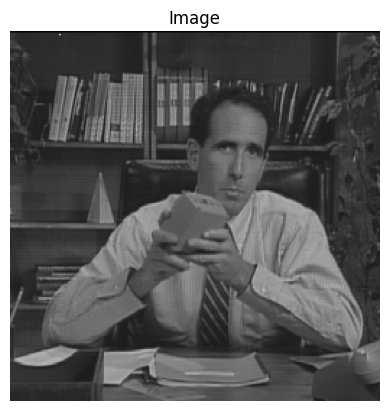

Image saved to inputImage.png


In [4]:
xb = load_image("../../data/salesmanbin.sec", size)
show_image(xb)
save_image(xb, "inputImage.png")

In [5]:
# Zero-pad the image
xf2 = np.zeros((size2, size2), dtype=np.float32)
xf2[3:-3, 3:-3] = xb.astype(np.float32)

# Initialize output float image
yf = np.zeros((size, size), dtype=np.float32)

In [6]:
# Apply the 7x7 average filter
for row in range(size):
    for col in range(size):
        window = xf2[row:row + 7, col:col + 7]
        yf[row, col] = np.sum(window) * one_on_49

In [7]:
# Normalize and convert to uint8
yb = ((yf - yf.min()) / (yf.max() - yf.min()) * 255).astype(np.uint8)

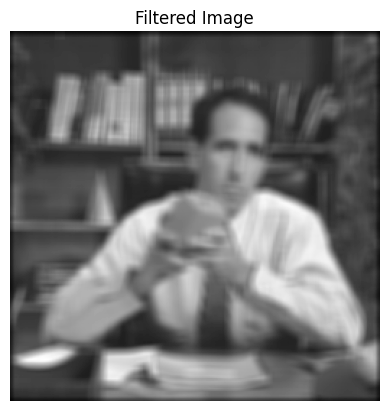

Image saved to filterd_image.png


In [8]:
show_image(yb, title="Filtered Image")
save_image(yb, "filterd_image.png")